**Regression Analysis**
                            
Hult International Business School

Maching Learning - MsBA2

Professor: Chase Kusterer

Coded by Gabriela Ledesma Valenzuela

# Analyzing the dataset

Importing the necessary libraries and checking the general dataset

In [1]:
# Importing libraries
import pandas as pd                        # data science essentials
import matplotlib.pyplot as plt            # essential graphical output
import seaborn as sns                      # enhanced graphical output
import numpy as np                         # mathematical essentials
import statsmodels.formula.api as smf      # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Specifying file name
file = '/Users/gabyvalenzuela/Documents/31. Personal Portfolio/ML (Python)/Datasets/Apprentice_Chef_Dataset.xlsx'

# Reading the file into Python
chef_dataset = pd.read_excel(file)

In [3]:
# Using .shape to view (ROWS, COLUMNS)
chef_dataset.shape

(1946, 28)

In [4]:
# Formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef_dataset.shape[0]}
Features:     {chef_dataset.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [5]:
# Printing column names
print(chef_dataset.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [6]:
# Displaying the first rows of the DataFrame
chef_dataset.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [7]:
# Information about each variable
#chef_dataset.info()
chef_dataset.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


# Variables' analysis and transformation

Analysis of variables by displaying graphs and transformation as needed

<h2> Graph display </h2>

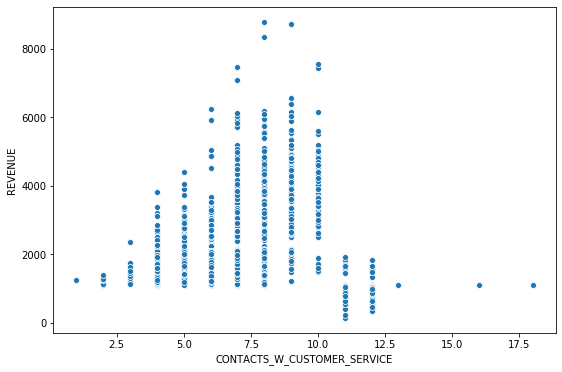

In [8]:
# Setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# Developing a scatterplot
sns.scatterplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'REVENUE',
                data = chef_dataset)


# Showing the results
plt.show()

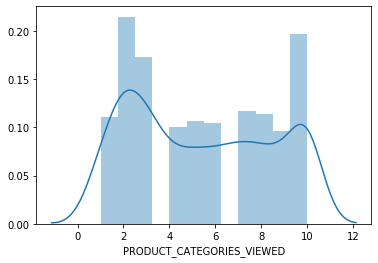

In [11]:
#Displaying graphs

sns.distplot(a = chef_dataset['PRODUCT_CATEGORIES_VIEWED'])


# displaying the histogram
plt.show()

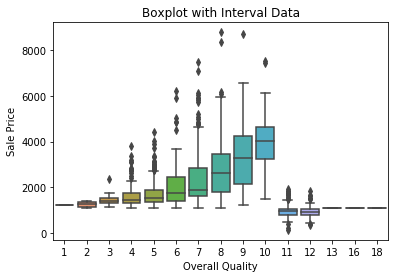

In [9]:
# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = chef_dataset)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

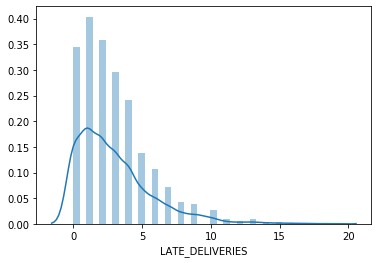

In [18]:
#Displaying graphs

sns.distplot(a = chef_dataset['LATE_DELIVERIES'])


# displaying the histogram
plt.show() 

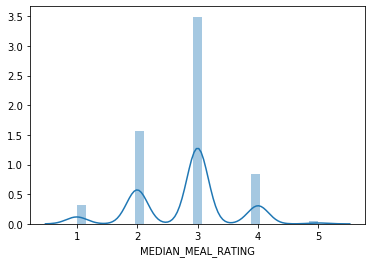

In [22]:
#Displaying graphs

sns.distplot(a = chef_dataset['MEDIAN_MEAL_RATING'])


# displaying the histogram
plt.show() 

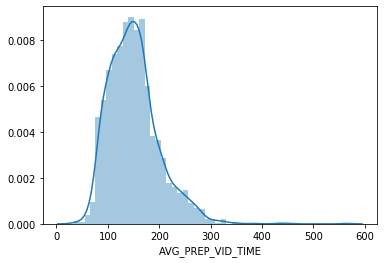

In [19]:
#Displaying graphs

sns.distplot(a = chef_dataset['AVG_PREP_VID_TIME'])


# displaying the histogram
plt.show() 

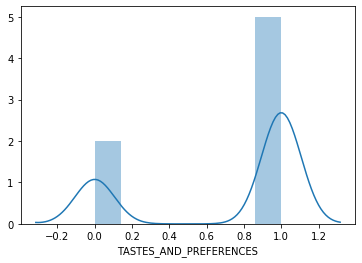

In [26]:
#Displaying graphs

sns.distplot(a = chef_dataset['TASTES_AND_PREFERENCES'])


# displaying the histogram
plt.show() 

<h2> LOG Transformation </h2>

Variables transformation

In [29]:
#Transforming data to LOG

# Log transforming values and saving them to the dataset

chef_dataset['log_REVENUE'] = np.log10(chef_dataset['REVENUE'])

chef_dataset['log_UNIQUE_MEALS_PURCH'] = np.log10(chef_dataset['UNIQUE_MEALS_PURCH'])

chef_dataset['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef_dataset['PRODUCT_CATEGORIES_VIEWED'])

chef_dataset['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef_dataset['AVG_TIME_PER_SITE_VISIT'])

chef_dataset['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(chef_dataset['CANCELLATIONS_BEFORE_NOON'])

chef_dataset['log_PC_LOGINS'] = np.log10(chef_dataset['PC_LOGINS'])

chef_dataset['log_MOBILE_LOGINS '] = np.log10(chef_dataset['MOBILE_LOGINS'])

chef_dataset['log_WEEKLY_PLAN '] = np.log10(chef_dataset['WEEKLY_PLAN'])

chef_dataset['log_EARLY_DELIVERIES'] = np.log10(chef_dataset['EARLY_DELIVERIES'])

chef_dataset['log_LATE_DELIVERIES'] = np.log10(chef_dataset['LATE_DELIVERIES'])

chef_dataset['log_AVG_PREP_VID_TIME'] = np.log10(chef_dataset['AVG_PREP_VID_TIME'])

chef_dataset['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef_dataset['MASTER_CLASSES_ATTENDED'])

chef_dataset['log_MEDIAN_MEAL_RATING'] = np.log10(chef_dataset['MEDIAN_MEAL_RATING'])

chef_dataset['log_TOTAL_PHOTOS_VIEWED'] = np.log10(chef_dataset['TOTAL_PHOTOS_VIEWED'])

chef_dataset['log_LARGEST_ORDER_SIZE'] = np.log10(chef_dataset['LARGEST_ORDER_SIZE'])

chef_dataset['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef_dataset['AVG_CLICKS_PER_VISIT'])


/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Checking the creation of the LOG variables in the dataset

In [30]:
#Describing the new dataset to see if any of the variables has infinity values
chef_dataset.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_UNIQUE_MEALS_PURCH,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_TIME_PER_SITE_VISIT,log_CANCELLATIONS_BEFORE_NOON,log_PC_LOGINS,log_MOBILE_LOGINS,log_WEEKLY_PLAN,log_EARLY_DELIVERIES,log_LATE_DELIVERIES,log_AVG_PREP_VID_TIME,log_MASTER_CLASSES_ATTENDED,log_MEDIAN_MEAL_RATING,log_TOTAL_PHOTOS_VIEWED,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710,3.270382,0.618819,0.639828,1.944993,-inf,0.739172,-inf,-inf,-inf,-inf,2.155557,-inf,0.426955,-inf,0.619524,1.123707
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124,0.211802,0.272617,0.306204,0.218151,NaN,0.046356,NaN,NaN,NaN,NaN,0.139008,NaN,0.138740,NaN,0.159871,0.078973
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000,2.117271,0.000000,0.000000,1.014100,-inf,0.602060,-inf,-inf,-inf,-inf,1.523746,-inf,0.000000,-inf,0.000000,0.698970
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000,3.130334,0.477121,0.477121,1.857332,-inf,0.698970,0.000000,0.000000,-inf,0.000000,2.058426,-inf,0.301030,-inf,0.477121,1.079181
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000,3.240549,0.698970,0.698970,1.973866,0.000000,0.778151,0.000000,0.845098,-inf,0.301030,2.163161,0.000000,0.477121,-inf,0.602060,1.113943
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000,3.426511,0.845098,0.903090,2.069252,0.301030,0.778151,0.301030,1.113943,0.477121,0.602060,2.239987,0.000000,0.477121,2.240549,0.698970,1.176091
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000,3.944174,1.278754,1.000000,3.216324,1.113943,0.845098,0.477121,1.716003,0.954243,1.278754,2.751433,0.477121,0.698970,3.204120,1.041393,1.278754


# Basic Model Creation

<h3> Basic OLS Model Display </h3>

No changes in original variables.

In order to display this model, besides analyzing variables through displaying graphs, some classification between categorical and continuous variables had to be done. 

In [28]:
#Creating s Basic OLS MODEL

# Step 1: INSTANTIATE a model object
#MODIFIED BY US
lm_best = smf.ols(formula =  """REVENUE ~      
                                TOTAL_MEALS_ORDERED +    
                                UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +
                                PRODUCT_CATEGORIES_VIEWED  +  
                                AVG_TIME_PER_SITE_VISIT +
                                CANCELLATIONS_BEFORE_NOON  +   
                                CANCELLATIONS_AFTER_NOON  +   
                                PC_LOGINS   +                 
                                MOBILE_LOGINS   +             
                                WEEKLY_PLAN    +          
                                EARLY_DELIVERIES  +   
                                LATE_DELIVERIES  +    
                                AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                AVG_CLICKS_PER_VISIT +     
                                TOTAL_PHOTOS_VIEWED +  
                                CROSS_SELL_SUCCESS +
                                MOBILE_NUMBER +
                                TASTES_AND_PREFERENCES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER     
                                """,   
                  data = chef_dataset)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:41   Log-Likelihood:                -15460.
No. Observations:                1946   AIC:                         3.097e+04
Df Residuals:                    1922   BIC:                         3.110e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<h3> Preparing the Basic Model </h3>

In [31]:
# Basic Model with LOGS that do not tend to infinity

#Creating an OLS MODEL

# Step 1: INSTANTIATE a model object
#MODIFIED BY US
lm_best = smf.ols(formula =  """log_REVENUE ~      
                                TOTAL_MEALS_ORDERED +    
                                log_UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +
                                PRODUCT_CATEGORIES_VIEWED  +  
                                AVG_TIME_PER_SITE_VISIT +
                                CANCELLATIONS_BEFORE_NOON  +   
                                CANCELLATIONS_AFTER_NOON  +   
                                PC_LOGINS   +                 
                                MOBILE_LOGINS   +             
                                WEEKLY_PLAN    +          
                                EARLY_DELIVERIES  +   
                                LATE_DELIVERIES  +    
                                log_AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                AVG_CLICKS_PER_VISIT +     
                                TOTAL_PHOTOS_VIEWED +  
                                CROSS_SELL_SUCCESS +
                                MOBILE_NUMBER +
                                TASTES_AND_PREFERENCES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER
                                """,   
                  data = chef_dataset)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     196.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:41   Log-Likelihood:                 1435.4
No. Observations:                1946   AIC:                            -2823.
Df Residuals:                    1922   BIC:                            -2689.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<h3> Displaying new graphs for dummy variables creation

Visual analyzing some of variables to check if they should be transformed according to its form and values

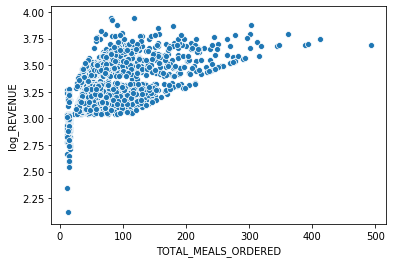

In [32]:
# developing a boxplot
sns.scatterplot(x    = 'TOTAL_MEALS_ORDERED',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()


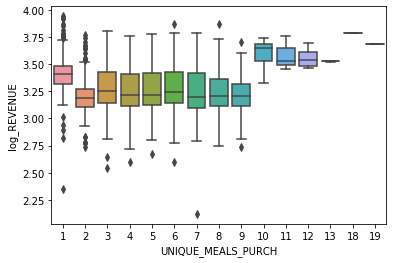

In [33]:
# developing a boxplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()


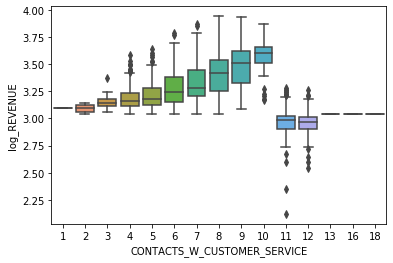

In [34]:
# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

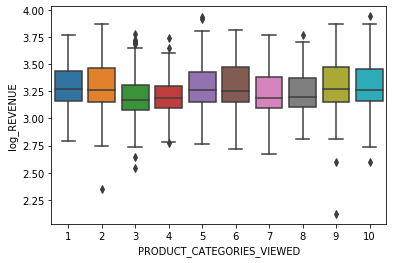

In [35]:
# developing a boxplot
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

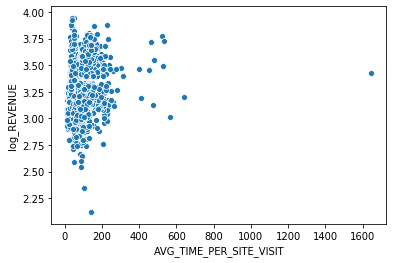

In [36]:
# developing a scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

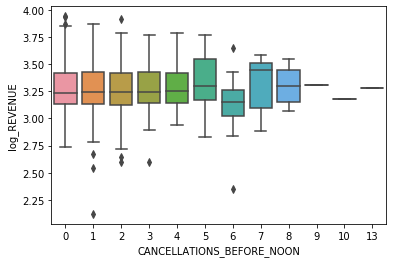

In [37]:
# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

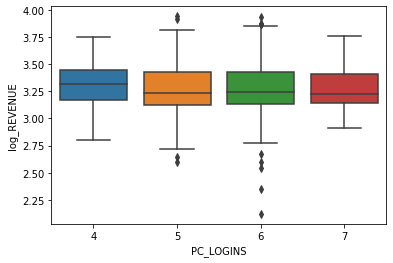

In [39]:
# developing a boxplot
sns.boxplot(x    = 'PC_LOGINS',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

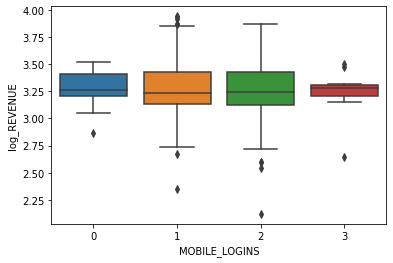

In [40]:
sns.boxplot(x    = 'MOBILE_LOGINS',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

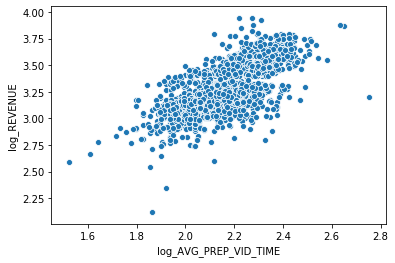

In [43]:
# developing a boxplot
sns.scatterplot(x    = 'log_AVG_PREP_VID_TIME',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

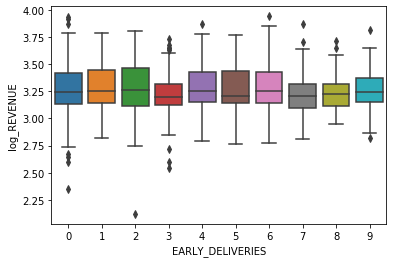

In [42]:
# developing a boxplot
sns.boxplot(x    = 'EARLY_DELIVERIES',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

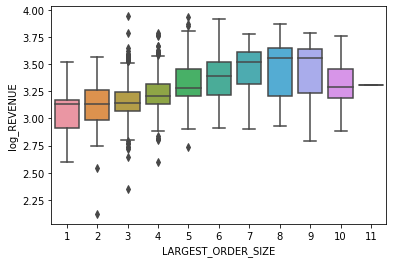

In [44]:
# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

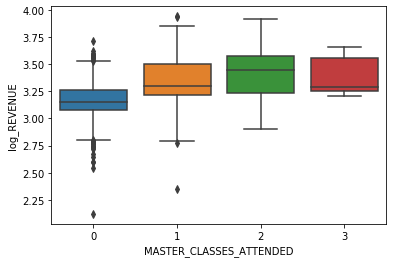

In [45]:
# developing a boxplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

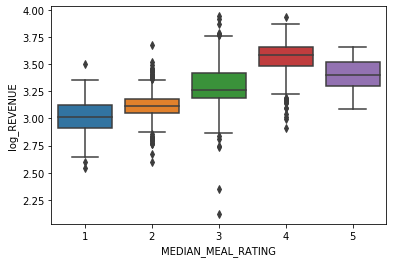

In [46]:
# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

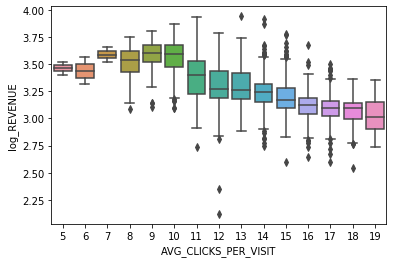

In [47]:
# developing a boxplot
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

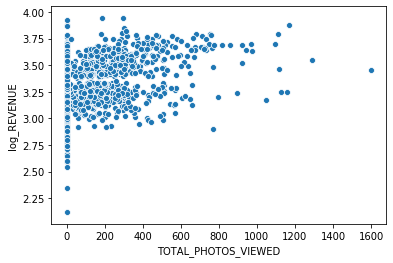

In [48]:
# developing a boxplot
sns.scatterplot(x    = 'TOTAL_PHOTOS_VIEWED',
                y    = 'log_REVENUE',
                data = chef_dataset)
# displaying the plot
plt.show()

<h3> Creation of new variables (dummy variables) </h3>

Creation of new variables based on the trends seen in the graphs as well as their values

In [96]:
# Creating dummy variables "D" 
chef_dataset['D_UNIQUE_MEALS_PURCH']              = 0  #9 
chef_dataset['D_CONTACTS_W_CUSTOMER_SERVICE']     = 0  #10 
chef_dataset['D_CANCELLATIONS_BEFORE_NOON']       = 0  #4 
chef_dataset['D_LARGEST_ORDER_SIZE']              = 0  #7 
chef_dataset['D_MASTER_CLASSES_ATTENDED']         = 0  #2 
chef_dataset['D_MEDIAN_MEAL_RATING']              = 0  #4 
chef_dataset['D_AVG_CLICKS_PER_VISIT']            = 0  #10 
chef_dataset['D_TOTAL_PHOTOS_VIEWED']             = 0  #0


# Iterating over each original column to
# Change values in the new feature columns
for index, value in chef_dataset.iterrows():
    
    # UNIQUE_MEALS_PURCH
    if chef_dataset.loc[index, 'UNIQUE_MEALS_PURCH'] > 9:
        chef_dataset.loc[index, 'D_UNIQUE_MEALS_PURCH'] = 1

    # CONTACTS_W_CUSTOMER_SERVICE
    if chef_dataset.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        chef_dataset.loc[index, 'D_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
    # CANCELLATIONS_BEFORE_NOON
    if chef_dataset.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 4:
        chef_dataset.loc[index, 'D_CANCELLATIONS_BEFORE_NOON'] = 1       

    # LARGEST_ORDER_SIZE
    if chef_dataset.loc[index, 'LARGEST_ORDER_SIZE'] > 7:
        chef_dataset.loc[index, 'D_LARGEST_ORDER_SIZE'] = 1

    # MASTER_CLASSES_ATTENDED
    if chef_dataset.loc[index, 'MASTER_CLASSES_ATTENDED'] > 2:
        chef_dataset.loc[index, 'D_MASTER_CLASSES_ATTENDED'] = 1
        
    # MEDIAN_MEAL_RATING
    if chef_dataset.loc[index, 'MEDIAN_MEAL_RATING'] > 4:
        chef_dataset.loc[index, 'D_MEDIAN_MEAL_RATING'] = 1        

    # AVG_CLICKS_PER_VISIT
    if chef_dataset.loc[index, 'AVG_CLICKS_PER_VISIT'] > 10:
        chef_dataset.loc[index, 'D_AVG_CLICKS_PER_VISIT'] = 1

    # TOTAL_PHOTOS_VIEWED
    if chef_dataset.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef_dataset.loc[index, 'D_TOTAL_PHOTOS_VIEWED'] = 1
 

Checking that the dummy variables have been created in the dataset

In [50]:
# Checking the creation of the new variables
chef_dataset[['D_UNIQUE_MEALS_PURCH', 'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON',\
              'D_LARGEST_ORDER_SIZE', 'D_MASTER_CLASSES_ATTENDED','D_MEDIAN_MEAL_RATING',\
              'D_AVG_CLICKS_PER_VISIT','D_TOTAL_PHOTOS_VIEWED']].head()

,D_UNIQUE_MEALS_PURCH,D_CONTACTS_W_CUSTOMER_SERVICE,D_CANCELLATIONS_BEFORE_NOON,D_LARGEST_ORDER_SIZE,D_MASTER_CLASSES_ATTENDED,D_MEDIAN_MEAL_RATING,D_AVG_CLICKS_PER_VISIT,D_TOTAL_PHOTOS_VIEWED
0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1


<h3> Trying and testing new options of Basic Models </h3>

Basic Model with LOGs and dummy variables

In [51]:
#Basic Model

#Creating an OLS MODEL

# Step 1: INSTANTIATE a model object
#MODIFIED BY US
lm_best = smf.ols(formula =  """log_REVENUE ~      
                                TOTAL_MEALS_ORDERED +    
                                log_UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +
                                PRODUCT_CATEGORIES_VIEWED  +  
                                AVG_TIME_PER_SITE_VISIT +
                                CANCELLATIONS_BEFORE_NOON  +   
                                CANCELLATIONS_AFTER_NOON  +   
                                PC_LOGINS   +                 
                                MOBILE_LOGINS   +             
                                WEEKLY_PLAN    +          
                                EARLY_DELIVERIES  +   
                                LATE_DELIVERIES  +    
                                log_AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                AVG_CLICKS_PER_VISIT +     
                                TOTAL_PHOTOS_VIEWED +  
                                CROSS_SELL_SUCCESS +
                                MOBILE_NUMBER +
                                TASTES_AND_PREFERENCES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                D_UNIQUE_MEALS_PURCH +
                                D_CONTACTS_W_CUSTOMER_SERVICE +
                                D_CANCELLATIONS_BEFORE_NOON +
                                D_LARGEST_ORDER_SIZE +
                                D_MASTER_CLASSES_ATTENDED +
                                D_MEDIAN_MEAL_RATING +
                                D_AVG_CLICKS_PER_VISIT +
                                D_TOTAL_PHOTOS_VIEWED
                                """,   
                  data = chef_dataset)

# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                 1651.1
No. Observations:                1946   AIC:                            -3238.
Df Residuals:                    1914   BIC:                            -3060.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Basic Model including only variables that are representative (high p-values)

In [52]:
#Basic Model

#Creating an OLS MODEL

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """log_REVENUE ~      
                                TOTAL_MEALS_ORDERED +    
                                log_UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +
                                CANCELLATIONS_AFTER_NOON  +      
                                log_AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                CROSS_SELL_SUCCESS +
                                D_UNIQUE_MEALS_PURCH +
                                D_CONTACTS_W_CUSTOMER_SERVICE +
                                D_MASTER_CLASSES_ATTENDED +
                                D_MEDIAN_MEAL_RATING +
                                D_AVG_CLICKS_PER_VISIT +
                                D_TOTAL_PHOTOS_VIEWED
                                """,   
                  data = chef_dataset)

# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     405.3
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                 1644.3
No. Observations:                1946   AIC:                            -3257.
Df Residuals:                    1930   BIC:                            -3167.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Transforming the categorical variable "emails" to a binary variable 

In [53]:
# Placeholder list
placeholder_lst = []

# Looping over each email address
for index, col in chef_dataset.iterrows():
    
    # Splitting email domain at '@'
    split_email = chef_dataset.loc[index, 'EMAIL'].split(sep = '@')
    
    # Appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# Displaying the results
email_df

# Renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domains']


# Concatenating personal_email_domain with friends DataFrame
chef_dataset = pd.concat([chef_dataset, email_df['personal_email_domains']],
                     axis = 1)

Categorizing email domains

In [54]:
# Email domain types
professional_email_domains = ['@mmm.com', '@amex.com','@apple.com','@boeing.com',
                             '@caterpillar.com', '@chevron.com','@cisco.com','@cocacola.com',
                             '@disney.com','@dupont.com','@exxon.com','@ge.org',
                             '@goldmansacs.com','@homedepot.com', '@ibm.com','@intel.com',
                             '@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
                             '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com',
                              '@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
junk_email_domains  = ['@me.com','@aol.com','@hotmail.com', '@live.com','@msn.com','@passport.com']

personal_email_domains  = ['@gmail.com','@yahoo.com','@protonmail.com']
 
 

# placeholder list
placeholder_lst = []


# Looping to group observations by domain type
for domain in chef_dataset['personal_email_domains']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('PROFESSIONAL')
        

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('JUNK')
        
    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('PERSONAL')


    else:
            print('Unknown')


# Concatenating with original DataFrame
chef_dataset['domain_group'] = pd.Series(placeholder_lst)


# Checking results
chef_dataset['domain_group'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: domain_group, dtype: int64

In [55]:
# One hot encoding categorical variable
one_hot_domain_group = pd.get_dummies(chef_dataset['domain_group'])

# Dropping categorical variable after it has been encoded
chef_dataset = chef_dataset.drop('domain_group', axis = 1)

# Joining codings together
chef_dataset = chef_dataset.join([one_hot_domain_group])

# OLS Model

<h4> Tuning </h4>

Tuning the last Basic Model

In [56]:
#Creating an OLS MODEL

# Step 1: Instantiate a model object

lm_best = smf.ols(formula =  """log_REVENUE ~      
                                TOTAL_MEALS_ORDERED +    
                                log_UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +
                                CANCELLATIONS_AFTER_NOON  +      
                                log_AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                CROSS_SELL_SUCCESS +
                                D_UNIQUE_MEALS_PURCH +
                                D_CONTACTS_W_CUSTOMER_SERVICE +
                                D_MASTER_CLASSES_ATTENDED +
                                D_MEDIAN_MEAL_RATING +
                                D_AVG_CLICKS_PER_VISIT +
                                D_TOTAL_PHOTOS_VIEWED +
                                JUNK +
                                PERSONAL +
                                PROFESSIONAL
                                """,   
                  data = chef_dataset)

# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     357.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                 1644.6
No. Observations:                1946   AIC:                            -3253.
Df Residuals:                    1928   BIC:                            -3153.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Checking the dataset and checking for infinity values

In [57]:
chef_dataset.head(5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_UNIQUE_MEALS_PURCH,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_TIME_PER_SITE_VISIT,log_CANCELLATIONS_BEFORE_NOON,log_PC_LOGINS,log_MOBILE_LOGINS,log_WEEKLY_PLAN,log_EARLY_DELIVERIES,log_LATE_DELIVERIES,log_AVG_PREP_VID_TIME,log_MASTER_CLASSES_ATTENDED,log_MEDIAN_MEAL_RATING,log_TOTAL_PHOTOS_VIEWED,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,D_UNIQUE_MEALS_PURCH,D_CONTACTS_W_CUSTOMER_SERVICE,D_CANCELLATIONS_BEFORE_NOON,D_LARGEST_ORDER_SIZE,D_MASTER_CLASSES_ATTENDED,D_MEDIAN_MEAL_RATING,D_AVG_CLICKS_PER_VISIT,D_TOTAL_PHOTOS_VIEWED,personal_email_domains,JUNK,PERSONAL,PROFESSIONAL
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,0.778151,1.00000,1.681241,0.477121,0.698970,0.30103,-inf,-inf,0.301030,1.523746,-inf,0.000000,-inf,0.0,1.230449,0,1,0,0,0,0,1,0,unitedhealth.com,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,0.477121,0.90309,1.605844,-inf,0.698970,0.00000,1.079181,-inf,0.301030,1.928396,-inf,0.477121,2.230449,0.0,1.113943,0,0,0,0,0,0,1,1,ge.org,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,0.845098,0.69897,1.296007,0.477121,0.778151,0.00000,0.000000,-inf,0.000000,1.799341,-inf,0.301030,-inf,0.0,1.204120,0,1,0,0,0,0,1,0,jnj.com,0,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,0.778151,0.69897,1.954243,0.301030,0.778151,0.00000,1.146128,-inf,0.477121,1.641474,-inf,0.301030,-inf,0.0,1.146128,0,1,0,0,0,0,1,0,ge.org,0,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,0.903090,1.00000,1.606166,-inf,0.698970,0.00000,0.698970,-inf,0.903090,1.928396,0.0,0.477121,2.311754,0.0,1.079181,0,0,0,0,0,0,1,1,jnj.com,0,0,1


<h4> Dropping variables </h4>

Dropping variables that will affect the model because of collinearity and irrelevance

In [58]:
# Code to drop some variables that will affect the model

# Making a copy of housing
new_chef_dataset = chef_dataset.copy()


# Dropping SalePrice and Order from the explanatory variable set
new_chef_dataset = new_chef_dataset.drop(['REVENUE',
                                        'log_REVENUE',
                                        'NAME','personal_email_domains',
                                        'FIRST_NAME', 'FAMILY_NAME','EMAIL', 
                                        'log_CANCELLATIONS_BEFORE_NOON',
                                        'log_EARLY_DELIVERIES', 'log_LATE_DELIVERIES',
                                        'log_MASTER_CLASSES_ATTENDED', 
                                        'log_TOTAL_PHOTOS_VIEWED'], axis = 1)


# Formatting each explanatory variable for statsmodels
for val in new_chef_dataset:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_UNIQUE_MEALS_PURCH +
log_PRODUCT_CATEGORIES_VIEWED +
log_AVG_TIME_PER_SITE_VISIT +
log_PC_LOGINS +
log_MOBILE_LOGINS  +
log_WEEKLY_PLAN  +
log_AVG_PREP_VID_TIME +
log_MEDIAN_MEAL_RATING +
log_LARGEST_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
D_UNIQUE_MEALS_PURCH +
D_CONTACTS_W_CUSTOMER_SERVICE +
D_CANCELLATIONS_BEFORE_NOON +
D_LARGEST_ORDER_SIZE +
D_MASTER_CLASSES_ATTENDED +
D_MEDIAN_MEAL_RATING +
D_AVG_CLICKS_PER_VISIT +
D_TOTAL_PHOTOS_VIEWED +
JUNK +
PERSONAL +
PROFESSIONAL +


Checking again the dataset with the latest change

In [59]:
new_chef_dataset.describe()

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_UNIQUE_MEALS_PURCH,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_TIME_PER_SITE_VISIT,log_PC_LOGINS,log_MOBILE_LOGINS,log_WEEKLY_PLAN,log_AVG_PREP_VID_TIME,log_MEDIAN_MEAL_RATING,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,D_UNIQUE_MEALS_PURCH,D_CONTACTS_W_CUSTOMER_SERVICE,D_CANCELLATIONS_BEFORE_NOON,D_LARGEST_ORDER_SIZE,D_MASTER_CLASSES_ATTENDED,D_MEDIAN_MEAL_RATING,D_AVG_CLICKS_PER_VISIT,D_TOTAL_PHOTOS_VIEWED,JUNK,PERSONAL,PROFESSIONAL
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710,0.618819,0.639828,1.944993,0.739172,-inf,-inf,2.155557,0.426955,0.619524,1.123707,0.009764,0.110997,0.044707,0.042138,0.003083,0.006680,0.902878,0.414183,0.199897,0.442446,0.357657
std,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124,0.272617,0.306204,0.218151,0.046356,NaN,NaN,0.139008,0.138740,0.159871,0.078973,0.098353,0.314209,0.206713,0.200955,0.055456,0.081481,0.296200,0.492707,0.400026,0.496804,0.479434
min,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.014100,0.602060,-inf,-inf,1.523746,0.000000,0.000000,0.698970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000,0.477121,0.477121,1.857332,0.698970,0.000000,0.000000,2.058426,0.301030,0.477121,1.079181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000,0.698970,0.698970,1.973866,0.778151,0.000000,0.845098,2.163161,0.477121,0.602060,1.113943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000,0.845098,0.903090,2.069252,0.778151,0.301030,1.113943,2.239987,0.477121,0.698970,1.176091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000

Checking the variables in the new dataset

In [98]:
#Getting the new dataset columns' name
new_chef_dataset.columns

Index(['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_UNIQUE_MEALS_PURCH', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_PC_LOGINS', 'log_AVG_PREP_VID_TIME', 'log_MEDIAN_MEAL_RATING', 'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'D_UNIQUE_MEALS_PURCH', 'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON', 'D_LARGEST_ORDER_SIZE', 'D_MASTER_CLASSES_ATTENDED', 'D_MEDIAN_MEAL_RATING', 'D_TOTAL_PHOTOS_VIEWED', 'JUNK', 'PERSONAL', 'PROFESSIONAL'], dtype='object')

In [61]:
# Setting the variables for the new dataset 
new_chef_dataset = new_chef_dataset.loc[:,['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                                     'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                                     'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                                     'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
                                     'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                                     'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
                                     'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                                     'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_UNIQUE_MEALS_PURCH',
                                     'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT',
                                     'log_PC_LOGINS', 'log_AVG_PREP_VID_TIME', 'log_MEDIAN_MEAL_RATING',
                                     'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'D_UNIQUE_MEALS_PURCH',
                                     'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON',
                                     'D_LARGEST_ORDER_SIZE', 'D_MASTER_CLASSES_ATTENDED', 'D_MEDIAN_MEAL_RATING',
                                     'D_AVG_CLICKS_PER_VISIT', 'D_TOTAL_PHOTOS_VIEWED','JUNK', 'PERSONAL',
                                     'PROFESSIONAL']]

# Formatting each explanatory variable for statsmodels
for val in new_chef_dataset:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_UNIQUE_MEALS_PURCH +
log_PRODUCT_CATEGORIES_VIEWED +
log_AVG_TIME_PER_SITE_VISIT +
log_PC_LOGINS +
log_AVG_PREP_VID_TIME +
log_MEDIAN_MEAL_RATING +
log_LARGEST_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
D_UNIQUE_MEALS_PURCH +
D_CONTACTS_W_CUSTOMER_SERVICE +
D_CANCELLATIONS_BEFORE_NOON +
D_LARGEST_ORDER_SIZE +
D_MASTER_CLASSES_ATTENDED +
D_MEDIAN_MEAL_RATING +
D_AVG_CLICKS_PER_VISIT +
D_TOTAL_PHOTOS_VIEWED +
JUNK +
PERSONAL +
PROFESSIONAL +


<h4> Preparing training and testing sets </h4>

In [62]:
# Preparing response variable data
chef_dataset_target = chef_dataset.loc[ : , 'REVENUE']
log_chef_dataset_target = chef_dataset.loc[ : , 'log_REVENUE'] # ready for use later


# Preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            new_chef_dataset,
            log_chef_dataset_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 42)
y-side: (1459,)


Testing Data
------------
X-side: (487, 42)
y-side: (487,)



<h4> OLS Model </h4>

In [63]:
########################## Best Model so far ##########################
# Merging X_train and y_train so that they can be used in statsmodels
chef_dataset_train = pd.concat([x_train, y_train], axis=1)

# Step 1: Build a model
lm_best = smf.ols(formula="""log_REVENUE ~ 
                                TOTAL_MEALS_ORDERED +    
                                log_UNIQUE_MEALS_PURCH  +          
                                CONTACTS_W_CUSTOMER_SERVICE   +     
                                log_AVG_PREP_VID_TIME   +        
                                LARGEST_ORDER_SIZE  +          
                                MASTER_CLASSES_ATTENDED  + 
                                MEDIAN_MEAL_RATING    +      
                                CROSS_SELL_SUCCESS +
                                D_UNIQUE_MEALS_PURCH +
                                D_CONTACTS_W_CUSTOMER_SERVICE +
                                D_MASTER_CLASSES_ATTENDED +
                                D_MEDIAN_MEAL_RATING +
                                D_AVG_CLICKS_PER_VISIT +
                                D_TOTAL_PHOTOS_VIEWED +
                                JUNK +
                                PERSONAL +
                                PROFESSIONAL""",
                  data=chef_dataset_train)

# Step 2: Fit the model based on the data
results = lm_best.fit()

# Step 3: Analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     287.0
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                 1255.9
No. Observations:                1459   AIC:                            -2478.
Df Residuals:                    1442   BIC:                            -2388.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [64]:
# Defining the variables of the model ommiting variables with "infinity" values
new_chef_dataset = new_chef_dataset.loc[:,['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                                     'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                                     'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                                     'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
                                     'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                                     'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
                                     'LARGEST_ORDER_SIZE', 'MEDIAN_MEAL_RATING',
                                     'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_UNIQUE_MEALS_PURCH',
                                     'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT',
                                     'log_PC_LOGINS', 'log_AVG_PREP_VID_TIME', 'log_MEDIAN_MEAL_RATING',
                                     'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'D_UNIQUE_MEALS_PURCH',
                                     'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_CANCELLATIONS_BEFORE_NOON',
                                     'D_LARGEST_ORDER_SIZE', 'D_MASTER_CLASSES_ATTENDED', 'D_MEDIAN_MEAL_RATING',
                                     'D_TOTAL_PHOTOS_VIEWED','JUNK', 'PERSONAL',
                                     'PROFESSIONAL']]


In [65]:
# Declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'log_AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
               'MEDIAN_MEAL_RATING', 'CROSS_SELL_SUCCESS', 'D_UNIQUE_MEALS_PURCH',
               'D_CONTACTS_W_CUSTOMER_SERVICE', 'D_MASTER_CLASSES_ATTENDED', 'D_MEDIAN_MEAL_RATING', 
               'D_TOTAL_PHOTOS_VIEWED', 'JUNK', 'PERSONAL', 'PROFESSIONAL']

# Applying modelin scikit-learn

# Preparing x-variables from the OLS model
ols_data = chef_dataset [x_variables]


# Preparing response variable
chef_dataset_target = chef_dataset['log_REVENUE']


###############################################
## setting up more than one train-test split ##    #### In here it seems you don't worry
###############################################    #### of P values
# New dataset, X-dataset (normal Y)
x_train, x_test, y_train, y_test = train_test_split(
            new_chef_dataset,     # x-variables
            chef_dataset_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,              # x-variables
            chef_dataset_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [66]:
new_chef_dataset.describe()

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_UNIQUE_MEALS_PURCH,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_TIME_PER_SITE_VISIT,log_PC_LOGINS,log_AVG_PREP_VID_TIME,log_MEDIAN_MEAL_RATING,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,D_UNIQUE_MEALS_PURCH,D_CONTACTS_W_CUSTOMER_SERVICE,D_CANCELLATIONS_BEFORE_NOON,D_LARGEST_ORDER_SIZE,D_MASTER_CLASSES_ATTENDED,D_MEDIAN_MEAL_RATING,D_TOTAL_PHOTOS_VIEWED,JUNK,PERSONAL,PROFESSIONAL
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,2.794964,13.508222,106.433710,0.618819,0.639828,1.944993,0.739172,2.155557,0.426955,0.619524,1.123707,0.009764,0.110997,0.044707,0.042138,0.003083,0.006680,0.414183,0.199897,0.442446,0.357657
std,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.756528,2.333876,181.014124,0.272617,0.306204,0.218151,0.046356,0.139008,0.138740,0.159871,0.078973,0.098353,0.314209,0.206713,0.200955,0.055456,0.081481,0.492707,0.400026,0.496804,0.479434
min,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.014100,0.602060,1.523746,0.000000,0.000000,0.698970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,2.000000,12.000000,0.000000,0.477121,0.477121,1.857332,0.698970,2.058426,0.301030,0.477121,1.079181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,3.000000,13.000000,0.000000,0.698970,0.698970,1.973866,0.778151,2.163161,0.477121,0.602060,1.113943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,3.000000,15.000000,174.000000,0.845098,0.903090,2.069252,0.778151,2.239987,0.477121,0.698970,1.176091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,5.000000,19.000000,1600.000000,1.278754,1.000000,3.216324,0.845098,2.751433,0.698970,1.041393,1.278754,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4> OLS - Linear regression </h4>

In [67]:
################################################################################
################################################################################
################################################################################
################################################################################
######################## LINEAR REGRESSION #####################################

# Instantiating a model object
lr = LinearRegression()


# Fitting to the training data
lr_fit = lr.fit(x_train, y_train)


# Predicting on new data
lr_pred = lr_fit.predict(x_test)


# Scoring the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test, y_test).round(4)) # using R-square

# Saving results
lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score  = lr.score(x_test, y_test).round(4)

# Displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


OLS Training Score : 0.7918
OLS Testing Score  : 0.7866
OLS Train-Test Gap : 0.0052


<h4> Zipping the OLS Model </h4>

In [68]:
# Zipping each feature name to its coefficient
lr_model_values = zip(new_chef_dataset[x_variables].columns,
                      lr_fit.coef_.round(decimals = 4))


# Setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 4))]


# Printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# Checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.83)
('TOTAL_MEALS_ORDERED', -0.0133)
('log_UNIQUE_MEALS_PURCH', 0.0007)
('CONTACTS_W_CUSTOMER_SERVICE', 0.05)
('log_AVG_PREP_VID_TIME', 0.0204)
('LARGEST_ORDER_SIZE', 0.0092)
('MEDIAN_MEAL_RATING', 0.0)
('CROSS_SELL_SUCCESS', 0.0008)
('D_UNIQUE_MEALS_PURCH', 0.0023)
('D_CONTACTS_W_CUSTOMER_SERVICE', -0.005)
('D_MASTER_CLASSES_ATTENDED', 0.0081)
('D_MEDIAN_MEAL_RATING', 0.0223)
('D_TOTAL_PHOTOS_VIEWED', -0.0058)
('JUNK', -0.0)
('PERSONAL', -0.002)
('PROFESSIONAL', -0.0004)


# Lasso Model

<h5> Importing the necessary libraries for Lasso Model </h5>

In [69]:
import sklearn.linear_model # Linear models

In [70]:
# Instantiating a model object
lasso_model = sklearn.linear_model.Lasso() # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# Predicting on new data
lasso_pred = lasso_fit.predict(x_test)


# Scoring the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## The following code has been provided for you ##

# Saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# Displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.5231
Lasso Testing Score  : 0.5565
Lasso Train-Test Gap : 0.0334


<h5> Zipping the Lasso Model </h5>

In [71]:
# Zipping each feature name to its coefficient
lasso_model_values = zip(new_chef_dataset.columns, lasso_fit.coef_.round(decimals = 2))


# Setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# Checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_UNIQUE_MEALS_PURCH', -0.0)
('log_PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.0)
('log_PC_LOGINS', -0.0)
('log_AVG_PREP_VID_TIME', 0.0)
('log_MEDIAN_MEAL_RATING', 0.0)
('log_LARGEST_ORDER_SIZE', 0.0)
('log_AVG_CLICKS_PER_VISIT', -0.0)
('D_UNIQUE_MEALS_PURCH', -0.0)
('D_CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('D_CANCEL

# ARD Model

<h5> Instating the ARD Model </h5>

In [72]:
# Instantiating a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# Fitting the training data
ard_fit = ard_model.fit(x_train, y_train)


# Predicting on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))


# Saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# Displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7123
Testing Score : 0.6908
ARD Train-Test Gap : 0.0215


<h6> Zipping for ARD Model </h6>

In [73]:
# Zipping each feature name to its coefficient
ard_model_values = zip(new_chef_dataset.columns, ard_fit.coef_.round(decimals = 5))


# Setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 4))]


# Printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 2.6352)
('CROSS_SELL_SUCCESS', 0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MEDIAN_MEAL_RATING', 0.21009)
('AVG_CLICKS_PER_VISIT', 0.05555)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_UNIQUE_MEALS_PURCH', -0.16146)
('log_PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.01074)
('log_PC_LOGINS', -0.02132)
('log_AVG_PREP_VID_TIME', 0.76928)
('log_MEDIAN_MEAL_RATING', -0.62121)
('log_LARGEST_ORDER_SIZE', -0.21589)
('log_AVG_CLICKS_PER_VISIT', -1.62078)
('D_UNIQUE_MEALS_PURCH', 0.18173)
('D_CONTACTS_W_CUST

# Models Comparison

<h7> Models comparisons results </h7>

In [87]:
# Comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# Creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7918            0.7866
Lasso      0.5231           0.5565
ARD        0.7123           0.6908



In [91]:
#Making the list a data frame to print later 
lr_model_lst = pd.DataFrame(lr_model_lst)

#Naming the columns 
lr_model_lst.columns = ['Variables','Coefficients']

#Removing indices for print
lr_model_lst_no_indices = lr_model_lst.to_string(index=False)

<h7> Table of models' comparisons </h7>

In [92]:
# Comparing results in a table

print(f"""
Model      Train Score      Test Score      Train-Test Gap     Model Size
-----      -----------      ----------      ---------------    ----------
OLS        {lr_train_score}            {lr_test_score}          {lr_test_gap}              {len(lr_model_lst)}
Lasso      {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}               {len(lasso_model_lst)}
ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap}               {len(ard_model_lst)}
""")


Model      Train Score      Test Score      Train-Test Gap     Model Size
-----      -----------      ----------      ---------------    ----------
OLS        0.7918            0.7866          0.0052              16
Lasso      0.5231           0.5565          0.0334               41
ARD        0.7123           0.6908          0.0215               41



# Selected Model Results

In [93]:
print(f"""

The final model that I selected is the OLS as it gives me the highest "Train" 
and "Test" score (0.79 & 0.78 respectively), as well as the least gap of all. 

Model      Train Score      Test Score      Train-Test Gap     Model Size
-----      -----------      ----------      ---------------    ----------
OLS        {lr_train_score}            {lr_test_score}          {lr_test_gap}               {len(lr_model_lst)}


Model Coefficients
------------------
{lr_model_lst_no_indices}

""")






The final model that I selected is the OLS as it gives me the highest "Train" 
and "Test" score (0.79 & 0.78 respectively), as well as the least gap of all. 

Model      Train Score      Test Score      Train-Test Gap     Model Size
-----      -----------      ----------      ---------------    ----------
OLS        0.7918            0.7866          0.0052               16


Model Coefficients
------------------
                     Variables  Coefficients
                     intercept        2.8300
           TOTAL_MEALS_ORDERED       -0.0133
        log_UNIQUE_MEALS_PURCH        0.0007
   CONTACTS_W_CUSTOMER_SERVICE        0.0500
         log_AVG_PREP_VID_TIME        0.0204
            LARGEST_ORDER_SIZE        0.0092
            MEDIAN_MEAL_RATING        0.0000
            CROSS_SELL_SUCCESS        0.0008
          D_UNIQUE_MEALS_PURCH        0.0023
 D_CONTACTS_W_CUSTOMER_SERVICE       -0.0050
     D_MASTER_CLASSES_ATTENDED        0.0081
          D_MEDIAN_MEAL_RATING        0.02